___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
from scipy import stats
from scipy import math
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.figure_factory as ff
#pd.set_option('display.min_rows', 100)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df0 = pd.read_csv('HR_Dataset.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [117]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [4]:
df.groupby('left')[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
df['Departments ']

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: Departments , Length: 14999, dtype: object

In [7]:
df = df.rename(columns={'Departments ': 'Departments'})

In [8]:
df.groupby(['Departments', 'salary'])['left'].count()

Departments  salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: left, dtype: int64

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

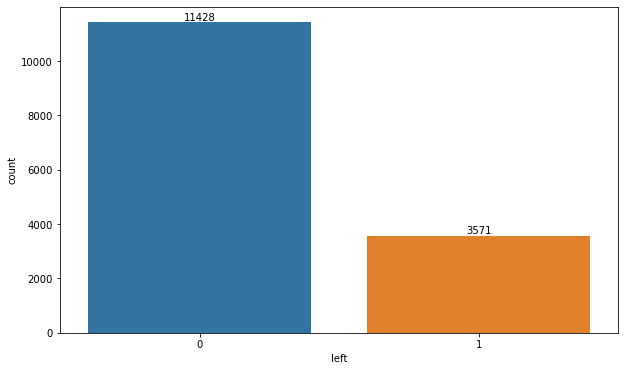

In [9]:
ax = sns.countplot(data = df, x ="left")
for p in ax.containers: 
    ax.bar_label(p)

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

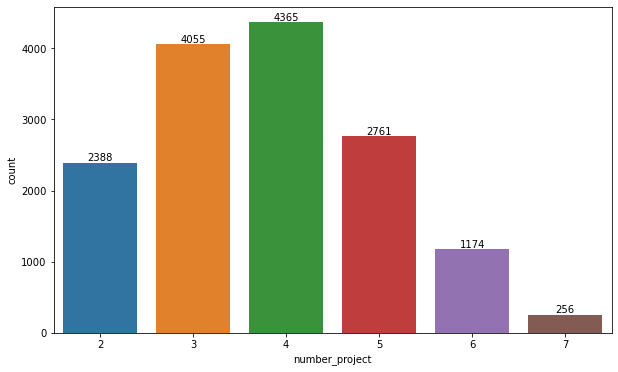

In [10]:
ax = sns.countplot(data = df, x ="number_project")
for p in ax.containers: 
    ax.bar_label(p)

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


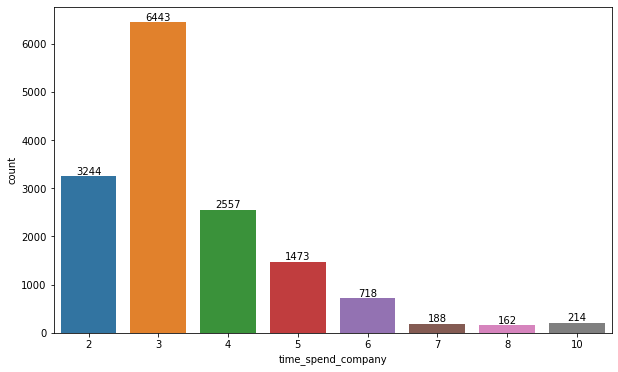

In [11]:
ax = sns.countplot(data = df, x ="time_spend_company")
for p in ax.containers: 
    ax.bar_label(p)

### Subplots of Features

You can use the methods of the matplotlib.

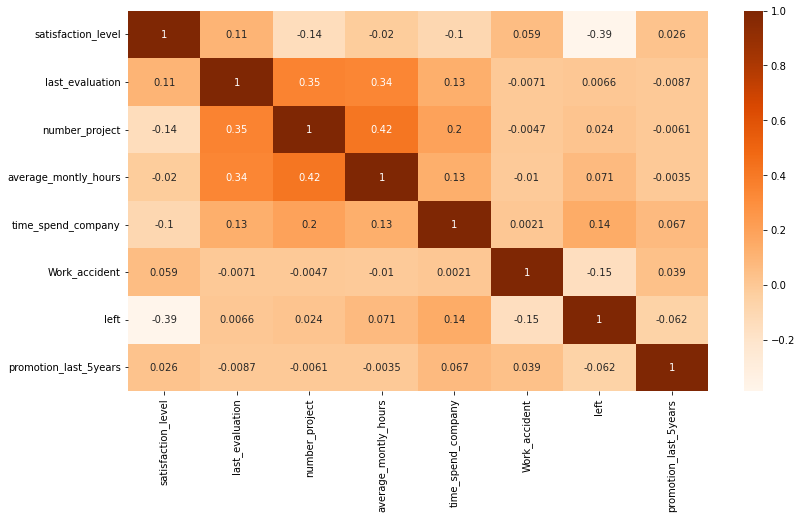

In [12]:
plt.figure(figsize = (13, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'Oranges');

- The factor that most influence the decision of an employee whether they will stay in a company or not is their Satisfication level

- Time spend at company and work_accident have a good relation with "left" column


## 3. Data Pre-Processing

#### Ordinal Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as ordinal encoding, and sklearn conveniently will do this for you using [OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).



In [13]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[["Departments","salary"]] = enc.fit_transform(df[["Departments","salary"]])

In [14]:
enc.categories_

[array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
        'product_mng', 'sales', 'support', 'technical'], dtype=object),
 array(['high', 'low', 'medium'], dtype=object)]

In [15]:
df[["Departments","salary"]]

,Departments,salary
0,7.0,1.0
1,7.0,2.0
2,7.0,2.0
3,7.0,1.0
4,7.0,1.0
...,...,...
14994,8.0,1.0
14995,8.0,1.0
14996,8.0,1.0
14997,8.0,1.0


#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [16]:
cols = df.columns

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)

In [18]:
df_scaled = pd.DataFrame(df_scaled, columns=[cols])
df_scaled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.777778,0.5
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.777778,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.777778,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.777778,0.5
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.777778,0.5
...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,1.0,0.0,0.888889,0.5
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,1.0,0.0,0.888889,0.5
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,1.0,0.0,0.888889,0.5
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,1.0,0.0,0.888889,0.5


## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [21]:
df_Kmeans = df_scaled.drop('left', axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  float64
 9   salary                 14999 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.1 MB


In [31]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.cluster import KMeans

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_Kmeans = scaler.fit_transform(df_Kmeans)

In [33]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(df_Kmeans)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

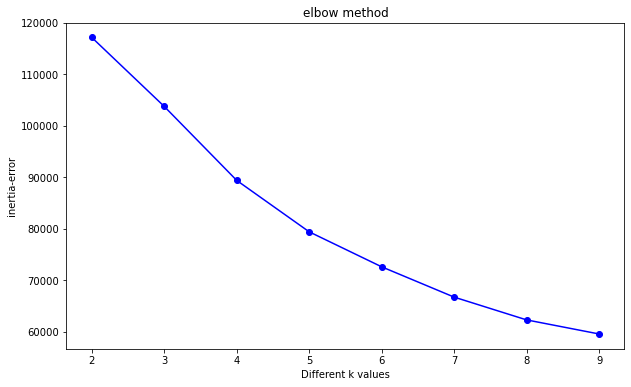

In [34]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

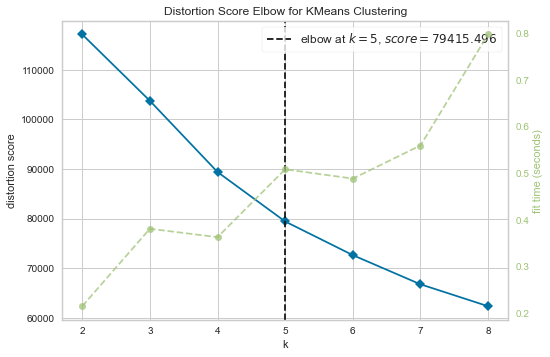

In [35]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(df_Kmeans)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts, for example, in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_scaled.drop('left',axis=1)
y = df_scaled['left']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### #Gradient Boosting Classifier

#### Model Building

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.9856666666666667

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

#### Prediction

### #KNeighbors Classifier

#### Model Building

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=4)

In [42]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [43]:
y_pred = knn_model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
y_pred_proba = knn_model.predict_proba(X_test)

In [109]:
x = pd.DataFrame(y_pred_proba)
x

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
2995,1.0,0.0
2996,1.0,0.0
2997,1.0,0.0
2998,0.5,0.5


In [113]:
y_test

,left
6723,0.0
6473,0.0
4679,0.0
862,1.0
7286,0.0
...,...
3297,0.0
14113,0.0
5514,0.0
9939,0.0


In [105]:
y_pred.shape

(3000,)

In [114]:
my_dict = {"Actual": y_test['left'], "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
#my_dict = {"Actual": y_test, "Pred":y_pred}

In [115]:
my_dict

{'Actual':       left
 6723   0.0
 6473   0.0
 4679   0.0
 862    1.0
 7286   0.0
 ...    ...
 3297   0.0
 14113  0.0
 5514   0.0
 9939   0.0
 14346  1.0
 
 [3000 rows x 1 columns],
 'Pred': array([0., 0., 0., ..., 0., 0., 0.]),
 'Proba_1': array([0. , 0. , 0. , ..., 0. , 0.5, 0.5]),
 'Proba_0': array([1. , 1. , 1. , ..., 1. , 0.5, 0.5])}

In [116]:
a = pd.DataFrame.from_dict(my_dict)

ValueError: Data must be 1-dimensional

#### Evaluating Model Performance

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [50]:
confusion_matrix(y_test, y_pred)

array([[2232,   62],
       [  81,  625]], dtype=int64)

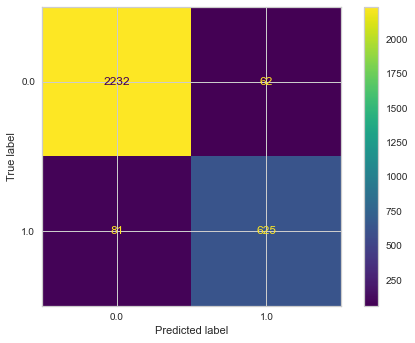

In [51]:
plot_confusion_matrix(knn_model, X_test, y_test);

In [52]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2232   62]
 [  81  625]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2294
         1.0       0.91      0.89      0.90       706

    accuracy                           0.95      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



#### Prediction

### #Random Forest Classifier

#### Model Building

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

#### Evaluating Model Performance

In [55]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2285    9]
 [  26  680]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2294
         1.0       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9134    0]
 [   1 2864]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9134
         1.0       1.00      1.00      1.00      2865

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [57]:
from sklearn.model_selection import cross_val_score, cross_validate
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.991583
test_precision_micro    0.991583
test_recall_micro       0.991583
test_f1_micro           0.991583
dtype: float64

### RF Model Feature Importance

In [95]:
rf_model.feature_importances_

array([0.3597594 , 0.11638538, 0.1646307 , 0.14884905, 0.18394546,
       0.00500693, 0.00110287, 0.01214278, 0.00817742])

In [58]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
satisfaction_level,0.359759
time_spend_company,0.183945
number_project,0.164631
average_montly_hours,0.148849
last_evaluation,0.116385
Departments,0.012143
salary,0.008177
Work_accident,0.005007
promotion_last_5years,0.001103


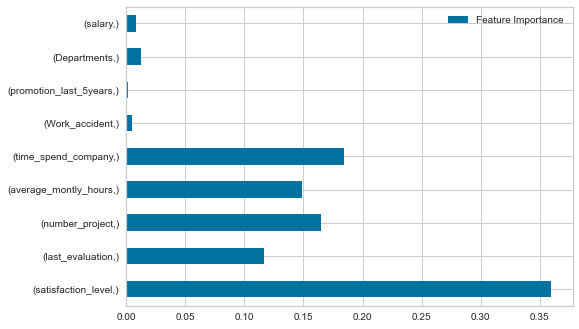

In [101]:
ax = rf_feature_imp.plot.barh()

#### New Random Forest Model with 5 features

In [61]:
# We have selected 5 features according to to the feature importance
features = ['satisfaction_level','time_spend_company','number_project', 'average_montly_hours','last_evaluation', 'left']

In [62]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [63]:
new_df = df[features]

In [64]:
new_df

,satisfaction_level,time_spend_company,number_project,average_montly_hours,last_evaluation,left
0,0.38,3,2,157,0.53,1
1,0.80,6,5,262,0.86,1
2,0.11,4,7,272,0.88,1
3,0.72,5,5,223,0.87,1
4,0.37,3,2,159,0.52,1
...,...,...,...,...,...,...
14994,0.40,3,2,151,0.57,1
14995,0.37,3,2,160,0.48,1
14996,0.37,3,2,143,0.53,1
14997,0.11,4,6,280,0.96,1


In [79]:
X_1 = new_df.drop('left',axis=1)
y_1 = new_df['left']

In [80]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [82]:
scaler_1 = MinMaxScaler()

In [84]:
X_train_scaled_1 = scaler_1.fit_transform(X_train_1)
X_test_scaled_1 = scaler_1.transform(X_test_1)

In [85]:
X_train_scaled_1.shape

(11999, 5)

In [86]:
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.fit(X_train_scaled_1,y_train_1)
eval_metric(rf_model_1, X_train_scaled_1, y_train_1, X_test_scaled_1, y_test_1)

Test_Set
[[2286    8]
 [  26  680]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000


Train_Set
[[9132    2]
 [   0 2865]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9134
           1       1.00      1.00      1.00      2865

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



#### New Random Forest Model with 3 features

In [72]:
# We have selected 5 features according to to the feature importance
features2 = ['satisfaction_level','time_spend_company','number_project', 'left']

In [87]:
new_df2 = df[features2]

In [88]:
X_2 = new_df2.drop('left',axis=1)
y_2 = new_df2['left']

In [89]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [90]:
scaler_2 = MinMaxScaler()

In [91]:
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)
X_test_scaled_2 = scaler_2.transform(X_test_2)

In [92]:
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train_scaled_2,y_train_2)
eval_metric(rf_model_2, X_train_scaled_2, y_train_2, X_test_scaled_2, y_test_2)

Test_Set
[[2253   41]
 [  50  656]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2294
           1       0.94      0.93      0.94       706

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000


Train_Set
[[8986  148]
 [ 115 2750]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9134
           1       0.95      0.96      0.95      2865

    accuracy                           0.98     11999
   macro avg       0.97      0.97      0.97     11999
weighted avg       0.98      0.98      0.98     11999



#### Prediction

In [ ]:
df0.describe().T

In [ ]:
observations = {"satisfaction_level": [0.44, 0.75], "last_evaluation":[0.65, 0.75], "number_project":[2, 4],
               "average_montly_hours":[102, 210], "time_spend_company":[4.0, 3.0], "Work_accident":[0.0, 1.0],
               "promotion_last_5years":[1.0, 0.0], "Departments":["hr", "sales"], "salary":["low", "low"]}

obs = pd.DataFrame(observations)
obs

In [ ]:
obs[["Departments", "salary"]]

In [ ]:
obs[["Departments", "salary"]] = enc.transform(obs[["Departments", "salary"]])

In [ ]:
obs

In [ ]:
pred = rf_model.predict(obs)
pred

### Inverse Transform

In [ ]:
obs[["Departments", "salary"]] = enc.inverse_transform(obs[["Departments", "salary"]])

In [ ]:
obs

In [ ]:
pred = pd.Series(pred).rename("left")

In [ ]:
pd.concat([obs, pred], axis=1)

## 6. Model Deployment

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [94]:
# Build random forest model

rf_model_final = RandomForestClassifier(random_state=42)
rf_model_final.fit(X_2,y_2)
# Saving the model
import pickle
pickle.dump(rf_model_final, open('churn_prediction.pkl', 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___